In [1]:
#Libraries to be used are included
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
#Data uploaded
data = pd.read_csv("swedish_insurance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
x_train = data["X"].to_numpy()
y_train = data["Y"].to_numpy()

In [5]:
print("Type of x_train:", type(x_train))
print("Type of y_train:", type(y_train))

Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>


In [6]:
print("The shape of x_train is:", x_train.shape)
print("The shape of y_train is:", y_train.shape)

The shape of x_train is: (63,)
The shape of x_train is: (63,)


In [7]:
print("First five elements of x_train:", x_train[:5])
print("First five elements of y_train:", y_train[:5])
print("Number of training examples(m):", len(x_train))

First five elements of x_train: [108  19  13 124  40]
First five elements of y_train: [392.5  46.2  15.7 422.2 119.4]
Number of training examples(m): 63


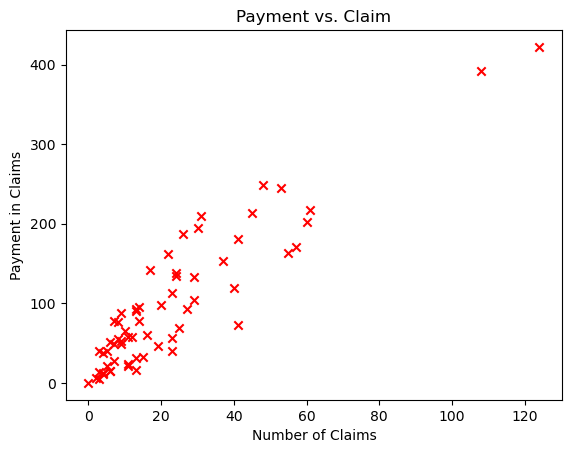

In [8]:
#Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Payment vs. Claim")
plt.ylabel("Payment in Claims")
plt.xlabel("Number of Claims")
plt.show()

## Compute Cost
This function calculate cost for one variable linear regression using the following formula. 

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [31]:
def compute_cost(x, y, w, b):
    #Number of training examples
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        total_cost += cost

    total_cost /= 2 * m
    
    return total_cost

## Compute Gradient
This function calculate $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ using the following forumlas

 $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
        
 
$$
        \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
$$
    
$$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
$$

In [35]:
def compute_gradient(x, y, w, b):
    #Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        temp_dw = (f_wb - y[i]) * x[i]
        temp_db = f_wb - y[i]
        
        dj_dw += temp_dw
        dj_db += temp_db
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

## Gradient Descent
This function implement gradient descent algorithm

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

In [36]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    #Number of training examples
    m = x[0].shape
    
    #Store cost J and weight w for each iteration
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        #Calculate gradient and update parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<100000: # prevent resource exhaustion
            #Calculate cost and save the array
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        
        #Print cost every at intervals 10 times
        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
            
    return w, b, J_history, w_history

In [45]:
initial_w = 0
initial_b = 0

#Gradient descent settings
iterations = 10000
alpha = 0.001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   755.46 
Iteration 1000: Cost   661.80 
Iteration 2000: Cost   638.63 
Iteration 3000: Cost   630.19 
Iteration 4000: Cost   627.13 
Iteration 5000: Cost   626.01 
Iteration 6000: Cost   625.60 
Iteration 7000: Cost   625.46 
Iteration 8000: Cost   625.40 
Iteration 9000: Cost   625.38 
w,b found by gradient descent: 3.4165637865140375 19.867578603427145


In [46]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

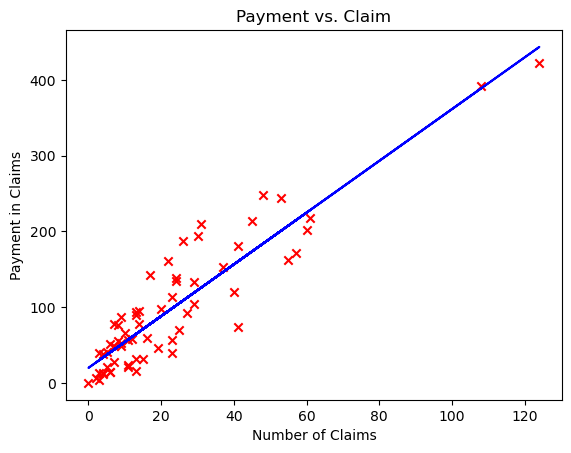

In [48]:
#Plot the linear fit and create a scatter plot
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Payment vs. Claim")
plt.ylabel("Payment in Claims")
plt.xlabel("Number of Claims")
plt.show()